# Credit Fraud Anamoly Detection

In [12]:
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing And EDA

In [7]:
df.info()
#df.info(verbose = False) 
#print('Columns with null values:\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- No null value.(# of non-null value = total obs = 284807).  
- All numeric features. 

Since the goal of this project is to detect anomoly, we don't need to check outliers.

In [8]:
df.describe()
# if categorical : df.describe(include='O')
# if all : df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 - Fraud ratio : 0.001727

Text(0.5, 1.0, 'Class Distributions \n (0: Not Fraud || 1: Fraud)')

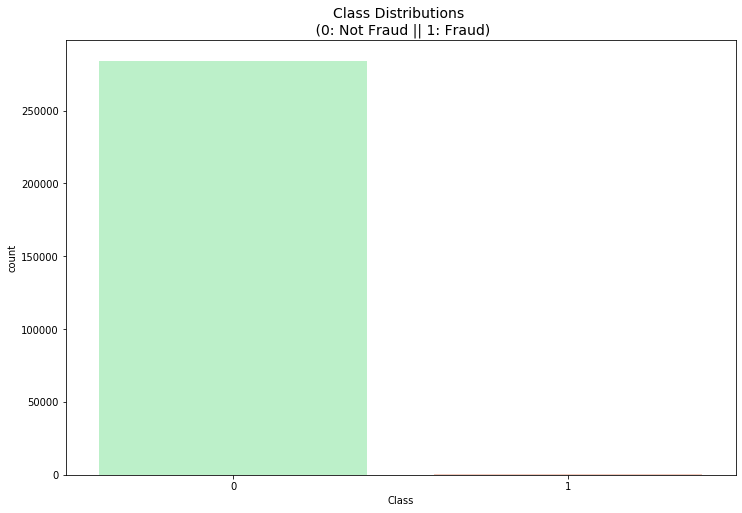

In [13]:
colors = ['#B3F9C5', '#f9c5b3']
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: Not Fraud || 1: Fraud)', fontsize=14)

- Highly imbalanced data.

In [22]:
Fraud = df[df['Class']==1]
NFraud = df[df['Class']==0]
print(Fraud.shape,NFraud.shape)

(492, 31) (284315, 31)


In [36]:
print(Fraud[["Amount","Time"]].describe())
print('-'*40)
print(NFraud[["Amount","Time"]].describe())

            Amount           Time
count   492.000000     492.000000
mean    122.211321   80746.806911
std     256.683288   47835.365138
min       0.000000     406.000000
25%       1.000000   41241.500000
50%       9.250000   75568.500000
75%     105.890000  128483.000000
max    2125.870000  170348.000000
----------------------------------------
              Amount           Time
count  284315.000000  284315.000000
mean       88.291022   94838.202258
std       250.105092   47484.015786
min         0.000000       0.000000
25%         5.650000   54230.000000
50%        22.000000   84711.000000
75%        77.050000  139333.000000
max     25691.160000  172792.000000


- The average amount of fraud = 122 > non-fraud.
- The average time of fraud transaction < non-fraud.

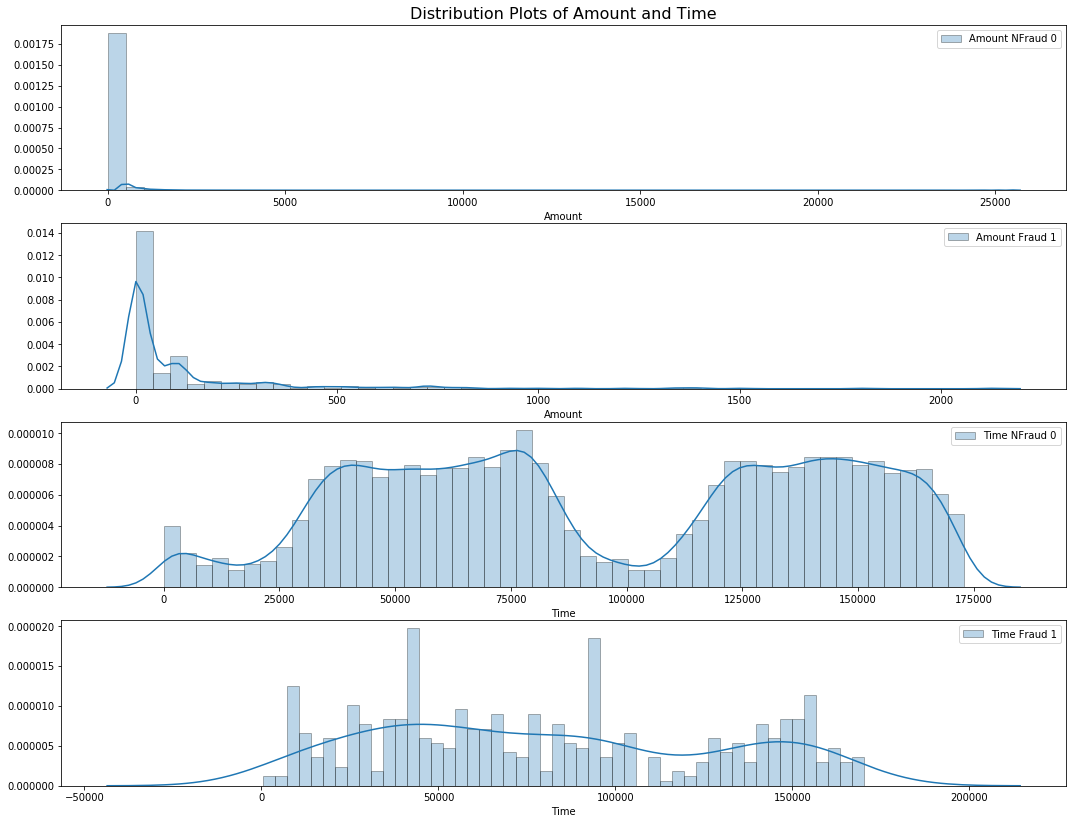

In [96]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.3}

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(18,14 ))
sns.distplot(NFraud['Amount'],label='Amount NFraud 0', ax=ax[0], hist_kws=hist_kws,bins=50)
sns.distplot(Fraud['Amount'],label='Amount Fraud 1', ax=ax[1], hist_kws=hist_kws,bins=50)
sns.distplot(NFraud['Time'],label='Time NFraud 0', ax=ax[2], hist_kws=hist_kws,bins=50)
sns.distplot(Fraud['Time'],label='Time Fraud 1', ax=ax[3], hist_kws=hist_kws,bins=50)
ax[0].set_title('Distribution Plots of Amount and Time', fontsize=16)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

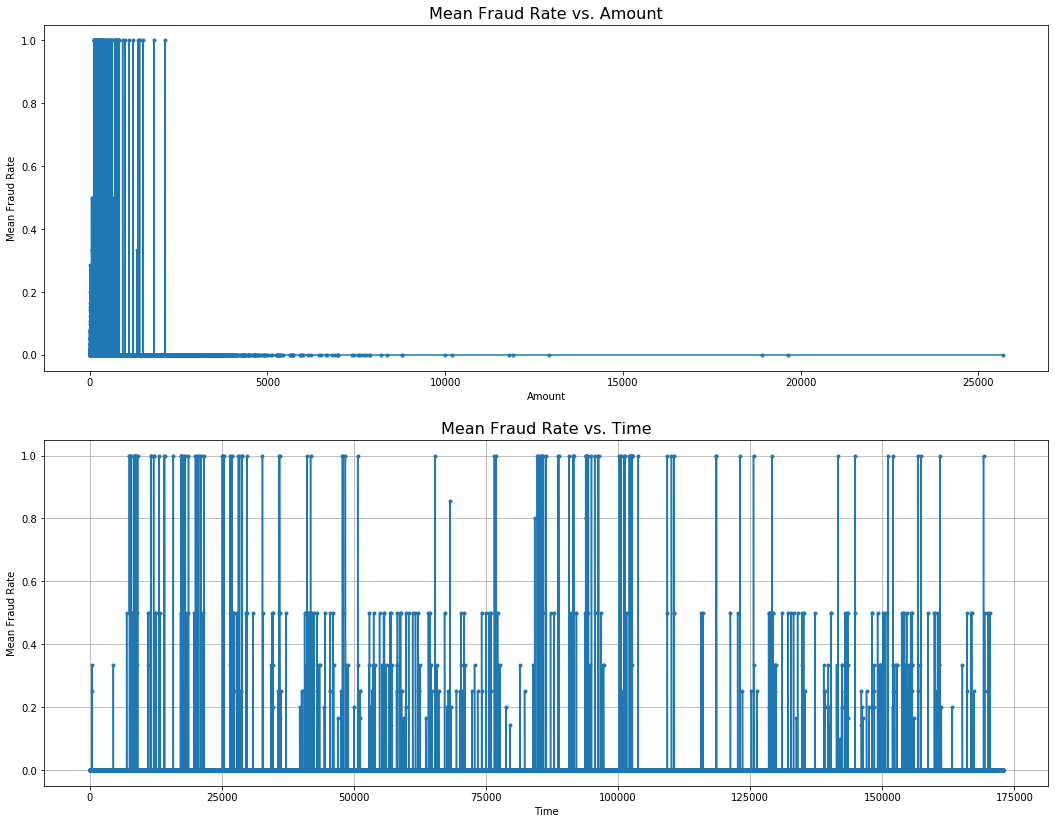

In [99]:
#Amount_grouped = df[['Amount', 'Class']].groupby('Amount').mean().reset_index()
#Time_grouped = df[['Time', 'Class']].groupby('Time').mean().reset_index()
#fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,14 ))
#ax[0].plot(Amount_grouped['Amount'], Amount_grouped["Class"], '.-')
#ax[0].set_title('Mean Fraud Rate vs. Amount', fontsize=16)
#ax[0].set_xlabel('Amount')
#ax[0].set_ylabel('Mean Fraud Rate')
#ax[1].grid(True)
#ax[1].plot(Time_grouped['Time'], Time_grouped["Class"], '.-')
#ax[1].set_title('Mean Fraud Rate vs. Time', fontsize=16)
#ax[1].set_xlabel('Time')
#ax[1].set_ylabel('Mean Fraud Rate')
#ax[1].grid(True)

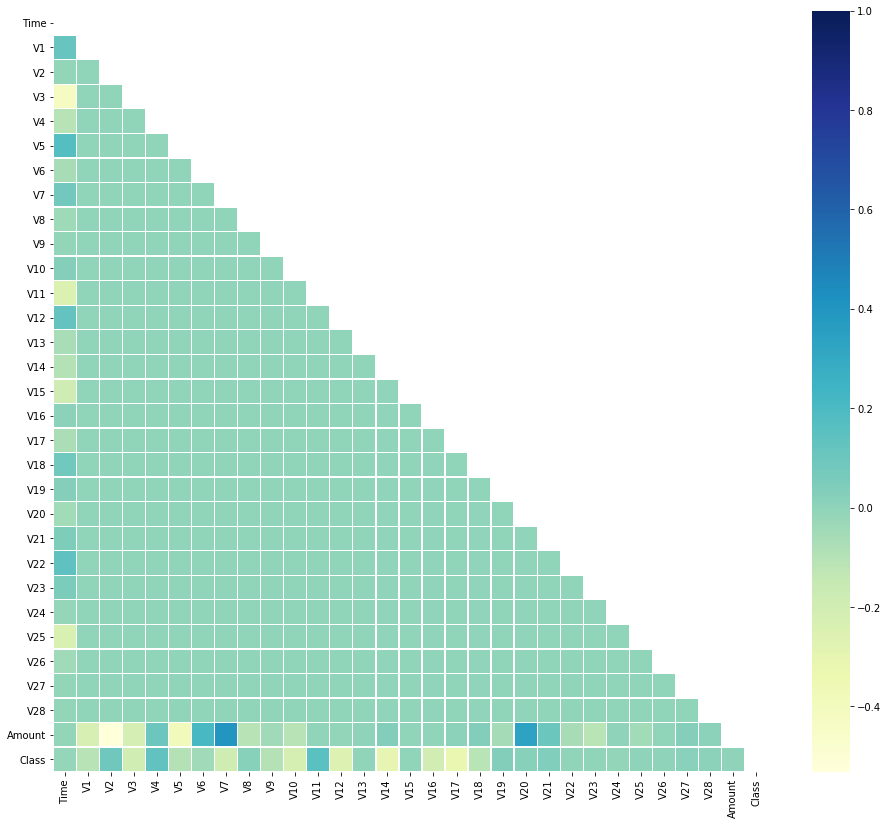

In [111]:
correlation = df.corr()
plt.figure(figsize=(16,14))
mask = np.zeros_like(correlation)#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation,linewidths=.3,mask=mask,cmap="YlGnBu")

- Class has a strong nagative relationshop with V14,V17; Postive with V11,V2,V4. 

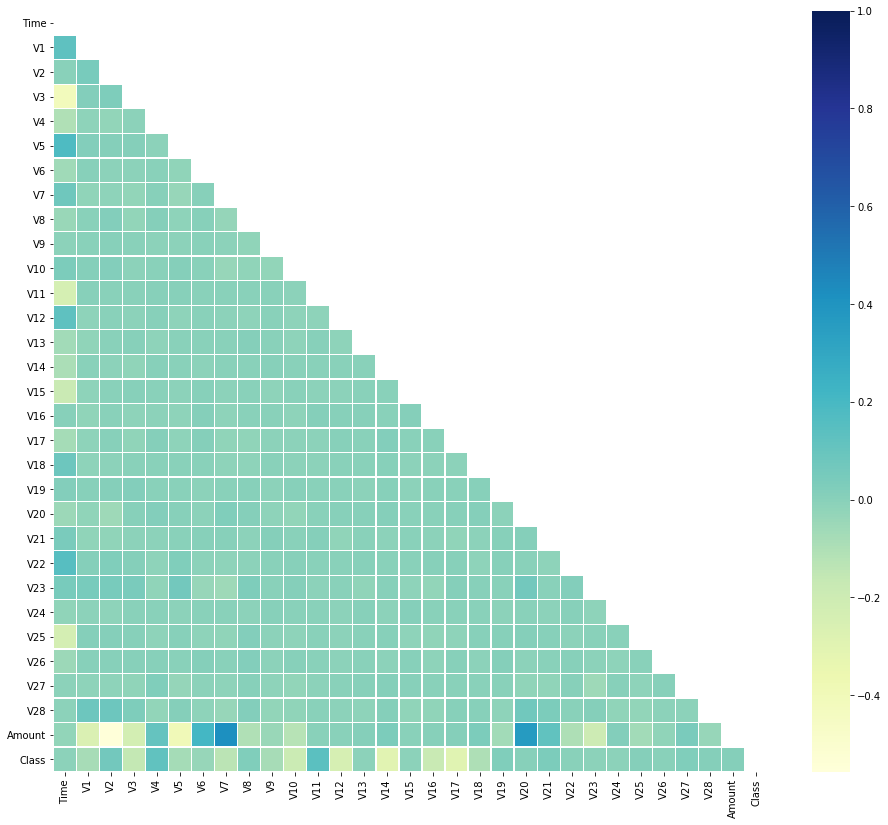

In [112]:
#Take some sample
df1= df.sample(frac = 0.1,random_state=1)
correlation1 = df1.corr()
plt.figure(figsize=(16,14))

sns.heatmap(correlation1,linewidths=.3,mask=mask,cmap="YlGnBu")

## Model Prediction

Normally we use resampling methods. But here we apply new techniques: **Isolation Forest Algorithm; Local Outlier Factor(LOF) Algorithm**. And comparing the accuracy using the Area Under the Precision-Recall Curve (AUPRC)

### **Isolation Forest Algorithm** : 
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

### **Local Outlier Factor(LOF) Algorithm** : 
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [148]:
#Create independent and Dependent Features
X = df1.drop("Class", axis=1)
Y = df1["Class"]
# Define a random state 
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Create an outlier_fraction
outlier_fraction = sum(Y==1)/sum(Y==0)
print(X.shape)
print(Y.shape)
print(outlier_fraction)

(28481, 30)
(28481,)
0.0017234102419808666


In [154]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [155]:
type(classifiers)

dict

In [156]:
n_outliers = sum(Y==1)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 77
Accuracy Score :
0.9972964432428637
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

    accuracy                           1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   

**Observations :**
- Isolation Forest detected 77 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors.
- Isolation Forest has a 99.73%, which is more accurate than LOF of 99.66% and SVM of 70.10%.
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the Precision/F1-score of detection of fraud cases is around 22 % versus LOF detection rate of just 2 % and SVM of 0%. 

**Conclusions :**\
So overall Isolation Forest Method performed much better in determining the fraud cases.

**Model Improvement:**\
1.Increasing the sample size; \
2.Using deep learning algorithms (computational cost).\
3.Using complex anomaly detection models.